## Time to get your hands dirty! The irreducible mass of black holes.

This is an example that comes straight out of my research in general relativity.

**Gerosa, Fabbri, Sperhake (2022) "*The irreducible mass and the horizon area of LIGO's black holes*" [arxiv:2202.08848](https://arxiv.org/abs/2202.08848), [CQG 39 (2022) 175008](https://iopscience.iop.org/article/10.1088/1361-6382/ac8332)**

(some of the calculations here were first worked out by Cecilia Fabbri in her BSc thesis with me).

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

Maybe some of you has seen this already in your GR class? In any case, a rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation)). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turns is the foundation of black-hole thermodynamics -- for you, my theorethical physics friend).


For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
$$
M_{\rm irr} = \sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
$$
For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$$

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.
- (masses and spins are uncorrelated)

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

#### Task:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint (for point 2)*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}/\mu$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

*Hint (for points 4 and 5)*. This is a KS test between two sets for samples, `scipy.stats.ks_2samp`.

You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. [**Optional, not examinable**] Compute the pdf of $f$ from its mathematical definition (pen and paper!). Verify this result: 

$$
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
$$

8. [**Optional, not examinable**]  Compute the pdfs of $M_{\rm irr}$ from its mathematical definition (pen and paper!). Verify this result:

$$
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,.
$$

The this expression is only semi-analytic; that integral should then be solved numerically.

*Hint (for point 8)*: You want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. 

9. Using the expressions from point 7 and 8, plot those pdfs check that they agree with your KDE reconstructions.


---



# Black hole mass data analysis

## Dataset generation

The irriducible mass of a black hole is given by the following equation: 
$$
M_{irr} = M f(\chi) \hspace{1cm} f(\chi) = \sqrt{\frac{1 + \sqrt{1 - \chi^2}}{2}}
$$
where $M$ is the mass of the black hole(in this problem it follows a normal distribution) and $\chi$ is the spin(in this problem it follows a uniform distribution between 0 and 1).

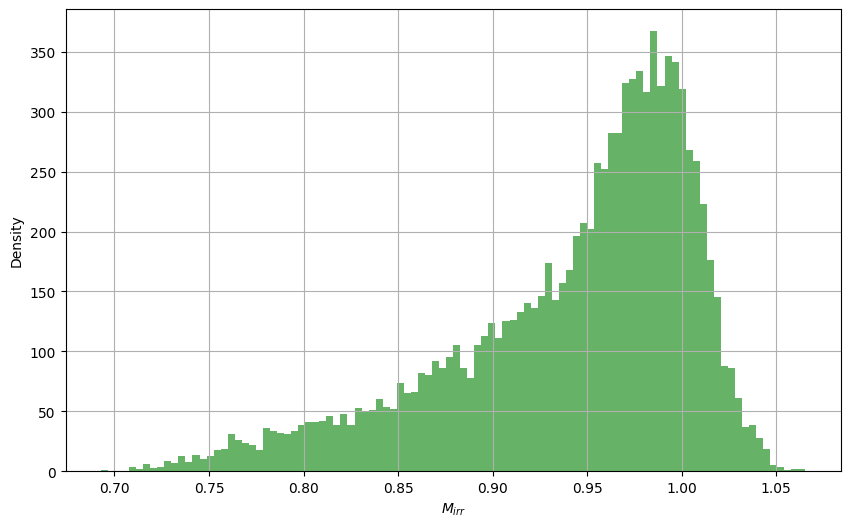

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def f(spin): 
    return np.sqrt((1 + np.sqrt(1 - spin**2)) / 2)

def M_irr(spin, mass):
    return mass * f(spin)

n_samples = 10000
mu = 1
sigma = 0.02
m_irr_values = []

for _ in range(n_samples):
    spin = random.uniform(0, 1)
    mass = random.gauss(mu, sigma)
    m_irr_values.append(M_irr(spin, mass))  

# plot histogram
plt.figure(figsize=(10, 6))
plt.hist(m_irr_values, bins=100, alpha=0.6, color='g')
plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.grid()
plt.show()


## Binning of the histogram

How can we choose the right binning for an histogram, because changing the number of been we can change the shape of the histogram and so the shape of the distribution. 
There are different binning that we can choose:
- **Scott's rule**: 
    $$
    \Delta_b = \frac{3.5\sigma}{N^{\frac{1}{3}}}
    $$
- **Freedman-Diaconis rule**:
    $$
    \Delta_b = \frac{2.7\sigma_G}{N^{\frac{1}{3}}}
    $$
    where $\sigma_G = 0.7413(q_{75}-q_{25})$ 
- **Bins with the same number of elements**:
    The idea is to don't have a fixed width for the bins but to change this in order to have always the same number of elements in each bin.

51


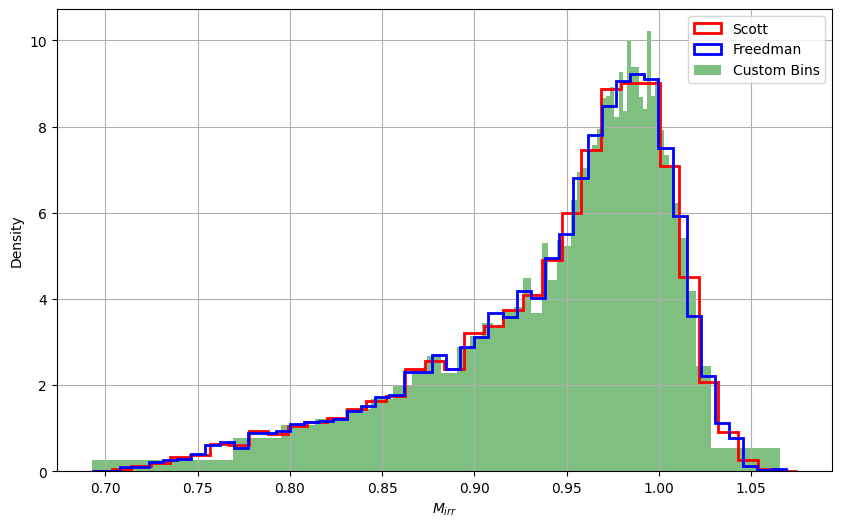

In [ ]:
from astropy.visualization.hist import hist

plt.figure(figsize=(10, 6))
_ = hist(m_irr_values, bins="scott",  density=True, histtype="step", linewidth=2, color="red", label="Scott")
_ = hist(m_irr_values, bins="freedman", density=True, histtype="step", linewidth=2, color="blue", label="Freedman")

custom_bins = np.append(np.sort(m_irr_values)[::200], np.max(m_irr_values)) 
# appending np.max(x) to the array, you ensure that the range of the bins spans from 
# the smallest value (implicitly included in the sorted array) to the largest value in x
print(len(custom_bins))

_ = hist(m_irr_values, bins=custom_bins, density=True, alpha=0.5, color="green", label="Custom Bins")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()


We can observe how changing the binning of the histograms also the shape of the distribution change. 
We can observe that two spikes appear around a $M_{irr}\approx 1$.

## Kernel Density Estimator (KDE)

The idea behind the KDE is to reconstruct a pdf from the data point, if we assign a pdf, for example a normal distribution, to each data point we can find the distribution of the entire dataset by summing over each single pdf. 

In the following code we try three different kernel: 
- **Gaussian**
- **Epanechnikov**: A gaussian distribution with truncated wings
- **Tophat**: A square distribution

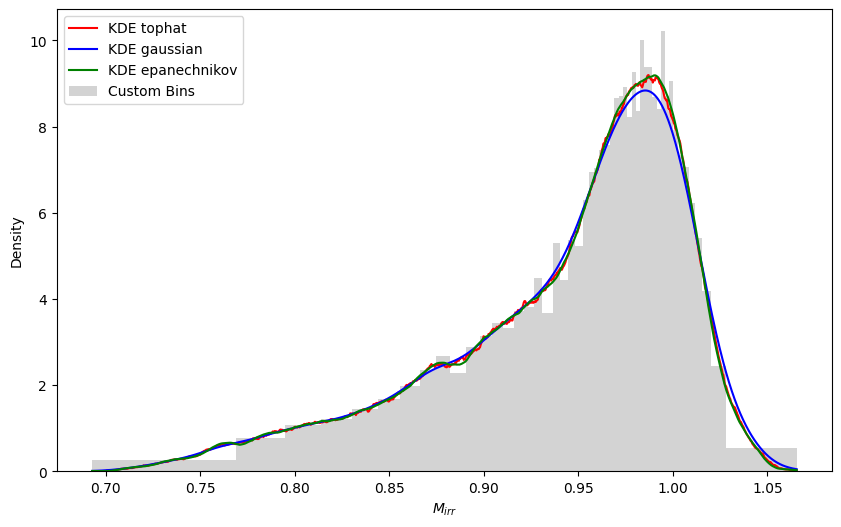

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

def kd_function(data, eval_points, bandwidth, kernel):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth) # data in 2D as input
    kde.fit(data[:, np.newaxis])
    # reshapes the 1D data array into a 2D array with one column. This is necessary because KernelDensity expects a 2D input (even for 1D data)
    log_density = kde.score_samples(eval_points[:, np.newaxis])
    # computes the logarithm of the estimated density at each point in eval_points
    return np.exp(log_density)

m_irr_values = np.array(m_irr_values)
x_plot = np.linspace(m_irr_values.min(), m_irr_values.max(), 1000)

pdf_tophat = kd_function(m_irr_values, x_plot, 1e-2, "tophat")
pdf_gaussian = kd_function(m_irr_values, x_plot, 1e-2, "gaussian")
pdf_epanechnikov = kd_function(m_irr_values, x_plot, 1e-2, "epanechnikov")

plt.figure(figsize=(10, 6))

plt.plot(x_plot.ravel(), pdf_tophat, color="red", label="KDE tophat")
plt.plot(x_plot.ravel(), pdf_gaussian, color="blue", label="KDE gaussian")
plt.plot(x_plot.ravel(), pdf_epanechnikov, color="green", label="KDE epanechnikov")
_ = hist(m_irr_values, bins=custom_bins, density=True, color="lightgray", label="Custom Bins")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.legend()
plt.show()

### Bandwidth

A very important parameter in KDE is the bandwith which controls the smoothness of the density estimate.
We can think of the bandwidth as the standard deviation of the kernel in the gaussian case.

Larger values result in smoother estimates (with **high bias**), while smaller values make the estimate more sensitive to the data (with **high variance**).

To study the effect of the bandwidth on the KDE, we can try different values of it using the gaussian kernel.

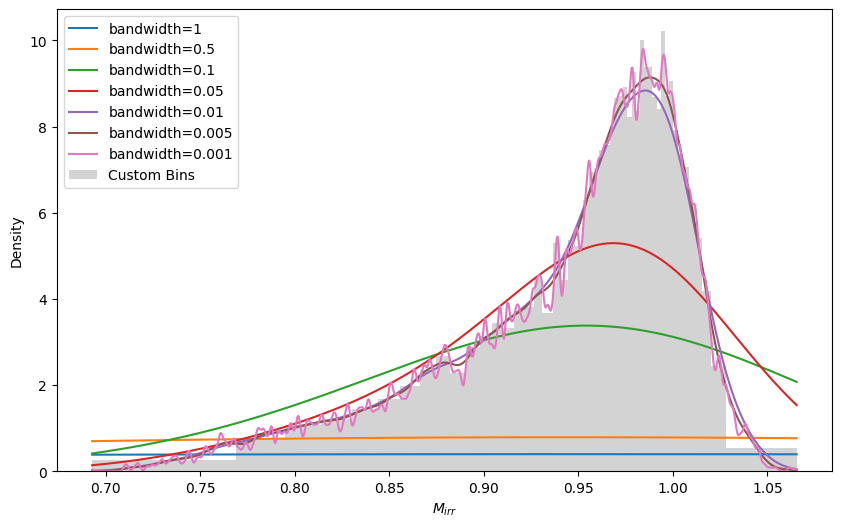

In [4]:
pdf_0 = kd_function(m_irr_values, x_plot, 1, "gaussian")
pdf_51 = kd_function(m_irr_values, x_plot, 5e-1, "gaussian")
pdf_1 = kd_function(m_irr_values, x_plot, 1e-1, "gaussian")
pdf_52 = kd_function(m_irr_values, x_plot, 5e-2, "gaussian")
pdf_2 = kd_function(m_irr_values, x_plot, 1e-2, "gaussian")
pdf_53 = kd_function(m_irr_values, x_plot, 5e-3, "gaussian")
pdf_3 = kd_function(m_irr_values, x_plot, 1e-3, "gaussian")

plt.figure(figsize=(10, 6))

plt.plot(x_plot.ravel(), pdf_0, label="bandwidth=1")
plt.plot(x_plot.ravel(), pdf_51, label="bandwidth=0.5")
plt.plot(x_plot.ravel(), pdf_1, label="bandwidth=0.1")
plt.plot(x_plot.ravel(), pdf_52, label="bandwidth=0.05")
plt.plot(x_plot.ravel(), pdf_2, label="bandwidth=0.01")
plt.plot(x_plot.ravel(), pdf_53, label="bandwidth=0.005")
plt.plot(x_plot.ravel(), pdf_3, label="bandwidth=0.001")
_ = hist(m_irr_values, bins=custom_bins, density=True, color="lightgray", label="Custom Bins")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.legend()
plt.show()

## Kolmogorov-Smirnov (KS) test

This test compare two different distribution by studing the difference between the cumulative functions:
$$
D = \max_x |F_1(x) - F_2(x)|
$$

We can understand that if two pdf are similar $D$ will approch 0.

/mnt/c/Users/User/Desktop/info/myenv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:394: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return hypotest_fun_in(*args, **kwds)


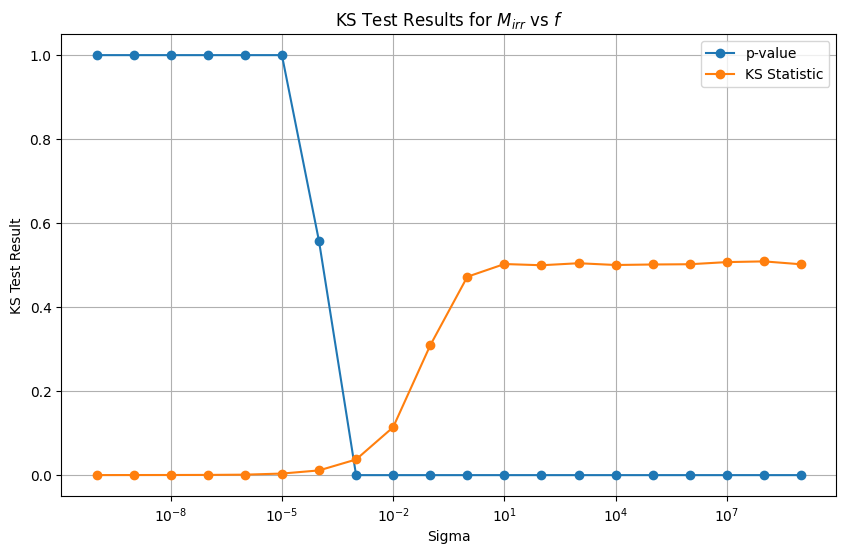

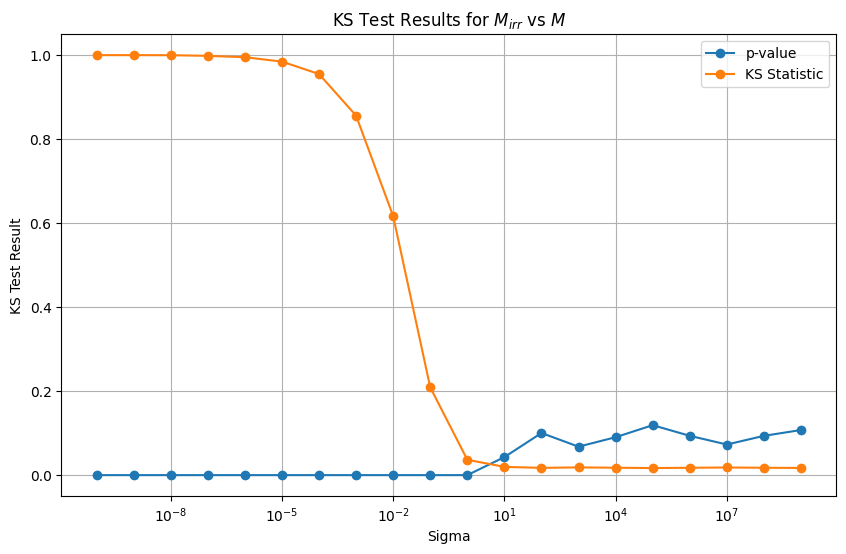

In [5]:
from scipy.stats import kstest
from scipy.stats import norm

sigmas = [10 ** i for i in range(-10, 10)]
ks_results_mir_f = {"p_value": [], "ks_statistic": []}
ks_results_mir_m = {"p_value": [], "ks_statistic": []}

for sigma in sigmas:
    mir = []
    m = []
    f_vec = []
    for _ in range(n_samples):
        spin = random.uniform(0, 1)
        mass = random.gauss(mu, sigma)
        mir.append(M_irr(spin, mass))
        f_vec.append(f(spin))
        m.append(mass)
    
    # Perform the Kolmogorov-Smirnov test
    ks_statistic, p_value = kstest(f_vec, mir)
    ks_results_mir_f["p_value"].append(p_value)
    ks_results_mir_f["ks_statistic"].append(ks_statistic)

    ks_statistic, p_value = kstest(m, mir)
    ks_results_mir_m["p_value"].append(p_value)
    ks_results_mir_m["ks_statistic"].append(ks_statistic)

plt.figure(figsize=(10, 6))
plt.plot(sigmas, ks_results_mir_f["p_value"], marker='o', label='p-value')
plt.plot(sigmas, ks_results_mir_f["ks_statistic"], marker='o', label='KS Statistic')
plt.title(r'KS Test Results for $M_{irr}$ vs $f$')
plt.xlabel('Sigma')
plt.ylabel('KS Test Result')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(sigmas, ks_results_mir_m["p_value"], marker='o', label='p-value')
plt.plot(sigmas, ks_results_mir_m["ks_statistic"], marker='o', label='KS Statistic')
plt.title(r'KS Test Results for $M_{irr}$ vs $M$')
plt.xlabel('Sigma')
plt.ylabel('KS Test Result')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

We can see how for small value of $\sigma$, $M_{irr}\approx f(\chi)$, while for high value of $\sigma$, $M_{irr}\approx M$.

## p-value

**High p-value** ($p > 0.05$):
The observed differences between the two distributions are likely due to random chance.

***Conclusion***: Fail to reject the null hypothesis. This suggests that the two distributions are not significantly different.

**Low p-value** ($p < 0.05$):
The observed differences between the two distributions are unlikely to have occurred by random chance.

***Conclusion***: Reject the null hypothesis. This suggests that the two distributions are significantly different.


Remember that for reject an hypotesis $p < 0.05$, but to find new physics we need $p < 5\sigma$
